# Regresja wielomianowa

In [8]:
import numpy as np
import pandas as pd

from scipy import stats
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$.
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [9]:
n = 100
x = stats.uniform.rvs(size = n,loc = -3, scale = 6)
eps = stats.norm.rvs(size = n, loc = 2,scale = 2)
y = x-2*(x**2)+0.5*(x**3)+eps

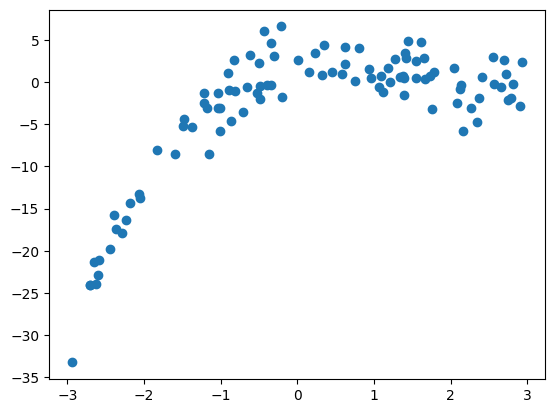

In [10]:
plt.scatter(x,y)
#zależność mocno nieliniowa

In [11]:
#regresja liniowa
x1 = x.reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(x1,y)


LinearRegression()

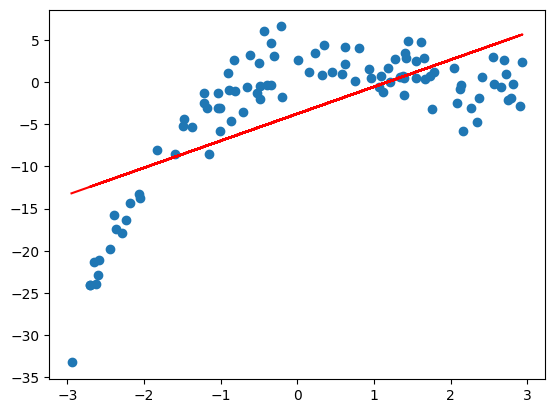

In [12]:
plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')
#regresja liniowa słabo się dopasowuje

In [13]:
p = PolynomialFeatures(degree=2,include_bias=False) # True/False - dodanie wyrazu wolnego
p.fit(x1)
p.transform(x1) 
# pierwsza kolumna to x, druga kolumna x^2

array([[-2.94461185e+00,  8.67073895e+00],
       [-4.39317080e-01,  1.92999496e-01],
       [-1.21797936e+00,  1.48347372e+00],
       [ 1.06387413e+00,  1.13182817e+00],
       [-1.03042110e+00,  1.06176765e+00],
       [ 1.41526675e+00,  2.00297999e+00],
       [-3.00286177e-01,  9.01717879e-02],
       [-3.39813221e-01,  1.15473025e-01],
       [ 5.79399087e-01,  3.35703303e-01],
       [-2.39468317e+00,  5.73450747e+00],
       [-2.05819384e+00,  4.23616190e+00],
       [ 4.54664426e-01,  2.06719740e-01],
       [ 2.78535017e+00,  7.75817559e+00],
       [-2.01609059e-01,  4.06462125e-02],
       [-2.37007568e+00,  5.61725871e+00],
       [-2.58086675e+00,  6.66087318e+00],
       [ 1.78808096e+00,  3.19723353e+00],
       [ 1.33871367e+00,  1.79215429e+00],
       [ 2.56062404e+00,  6.55679548e+00],
       [ 2.71564277e+00,  7.37471567e+00],
       [ 1.40337763e+00,  1.96946878e+00],
       [-7.08403785e-01,  5.01835922e-01],
       [ 1.39512208e+00,  1.94636562e+00],
       [ 2.

In [14]:
#dopasowujemy wielomian stopnia 2
pipeline2 = make_pipeline(p, LinearRegression())
pipeline2.fit(x1,y) # x2=PolynomialFeatures(degree=2,include_bias=False).fit.transform(x1), LinearRegression.fit(x2,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

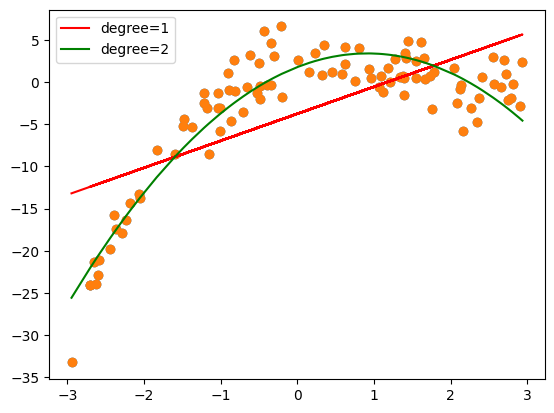

In [15]:
import operator
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')

#o wiele lepiej dopasowane, ale na ogonach mogłoby być lepiej
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline2.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')
plt.legend()

In [16]:
#dopasowujemy wielomian stopnia 3
pipeline3 = make_pipeline(PolynomialFeatures(degree=3,include_bias=False), LinearRegression())
pipeline3.fit(x1,y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

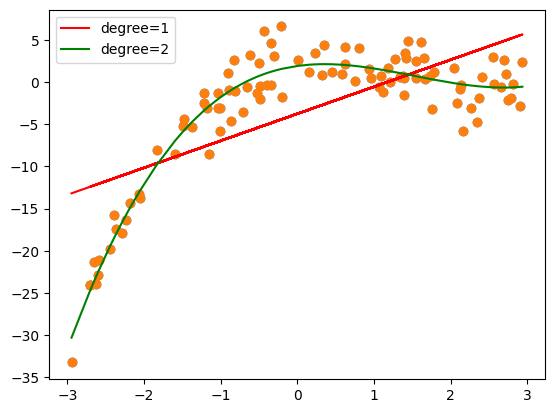

In [17]:
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')

#o wiele lepiej dopasowane, ale na ogonach mogłoby być lepiej
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')
plt.legend()

In [18]:
#dopasowujemy wielomian stopnia 20
pipeline20 = make_pipeline(PolynomialFeatures(degree=20,include_bias=False), LinearRegression())
pipeline20.fit(x1,y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=20, include_bias=False)),
                ('linearregression', LinearRegression())])

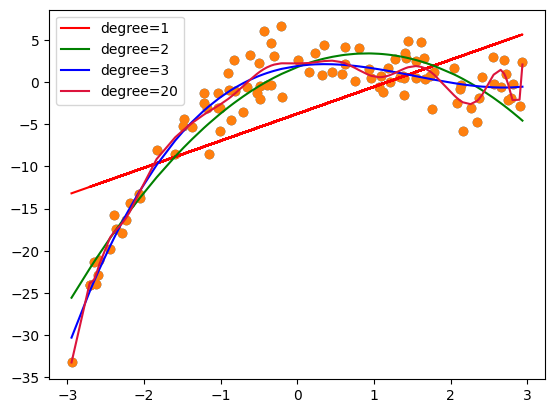

In [19]:
plt.scatter(x,y)

plt.scatter(x,y)
plt.plot(x,x*lm1.coef_+lm1.intercept_,color = 'red',label = 'degree=1')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline2.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')


sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, pipeline20.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')
plt.legend()
#model 1,x,x^2,x^3 bardzo ładnie się dopasował
#model 1,x,x^2...,x^20 dopasował się aż za dobrze, mamy przeuczenie, za duza elastycznosc modelu
# roznice spowodowane przez szum 


In [20]:
print(lm1.score(x1,y))
print(pipeline2.score(x1,y))
print(pipeline3.score(x1,y))
print(pipeline20.score(x1,y))
# niskie R^2 oznacza ze model nie jest dopasowany 
# duze R^2 moze za to oznaczac ze model jest przeuczony

0.4658310089130211
0.8768540791569075
0.9255326289595215
0.940787748922519


In [ ]:
# y = b0 + b11x_1 + b21x_2 + eps
# y = b0 + b11x_1 + b12x_1^2 + b22x_2^2 + eps 


In [ ]:
# kiedy wiem zeby skonczyc rozszerzanie modeli o kolejne stopnie
# czyli najpierw rozszerzamy a potem robimy regularyzacje 
# regularyzacja - ma na celu zredukowania wplywu zaleznosci ktorych w danych nie obserwujemy 
# minimalizuje do istotnego wielomianu 
# zapobiega przeuczaniu , przy jednoczesnym zachowaniu dobrego oddawania trendu do danych

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych, co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting).

Text(0.5, 0, 'Overfit\nLow bias\nHigh Variance')

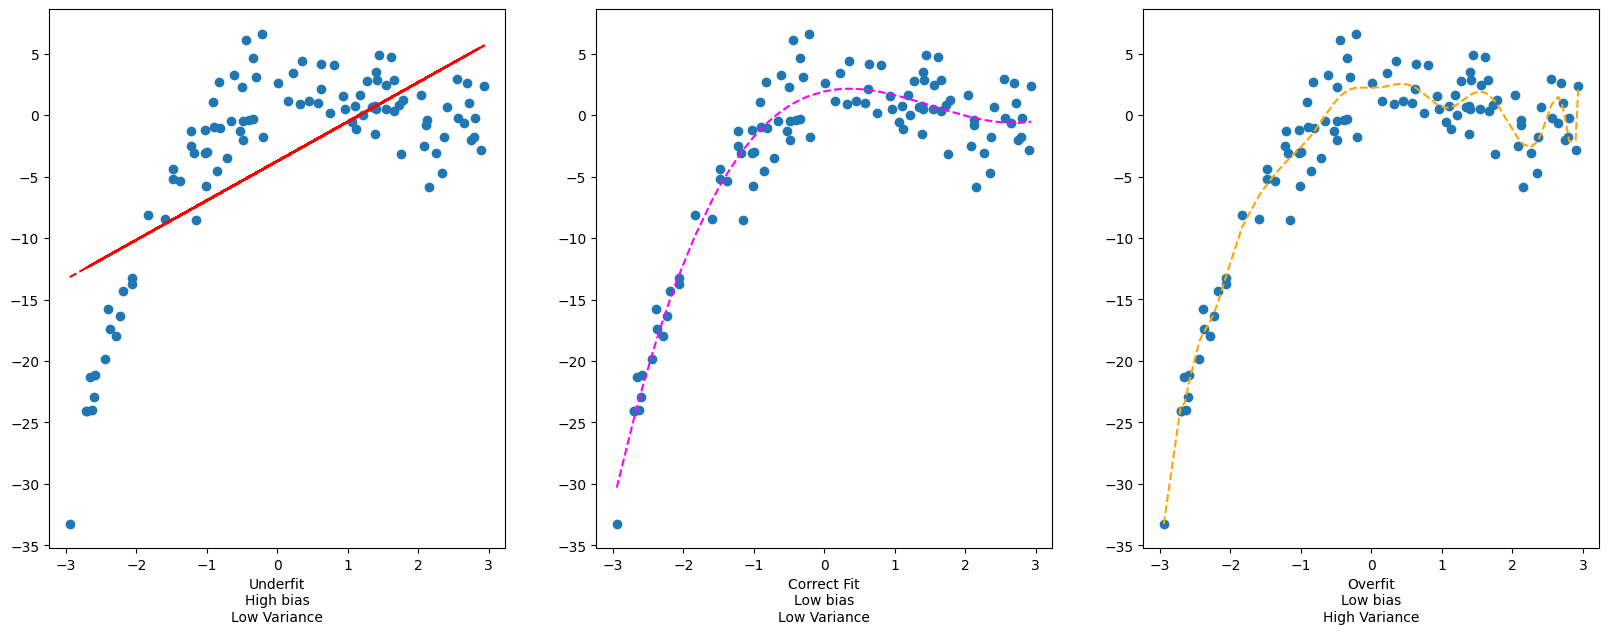

In [21]:
# liniowa underfit
# 1,x,x^2,x^3 bardzo dobre dopasowanie
# 1,x,x^2,...,x^20 overfit
fig, ax = plt.subplots(1, 3, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, lm1.predict(x1), '--', color='red', label="degree=1")
ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

sorted_zip = sorted(zip(x, pipeline20.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`).

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [24]:
amazon_salary = pd.read_csv("amazon_salaries.csv")
amazon_salary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [28]:
x = amazon_salary.Level
y = amazon_salary.Salary

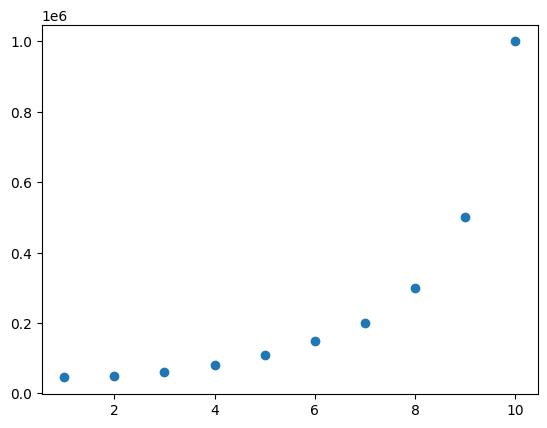

In [29]:
plt.scatter(x,y)

In [31]:
x

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [32]:
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [34]:
#regresja liniowa
x1 = x.reshape(-1,1)
lm2 = LinearRegression()
lm2.fit(x1,y)

LinearRegression()

In [39]:
pipeline2 = make_pipeline(p, LinearRegression())
pipeline2.fit(x1,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [42]:
pipeline3 = make_pipeline(PolynomialFeatures(degree=3,include_bias=False), LinearRegression())
pipeline3.fit(x1,y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('linearregression', LinearRegression())])

In [50]:
pipeline4 = make_pipeline(PolynomialFeatures(degree=4,include_bias=False), LinearRegression())
pipeline4.fit(x1,y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linearregression', LinearRegression())])

In [51]:
pipeline5 = make_pipeline(PolynomialFeatures(degree=5,include_bias=False), LinearRegression())
pipeline5.fit(x1,y)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linearregression', LinearRegression())])

Text(0.5, 0, 'degree=5')

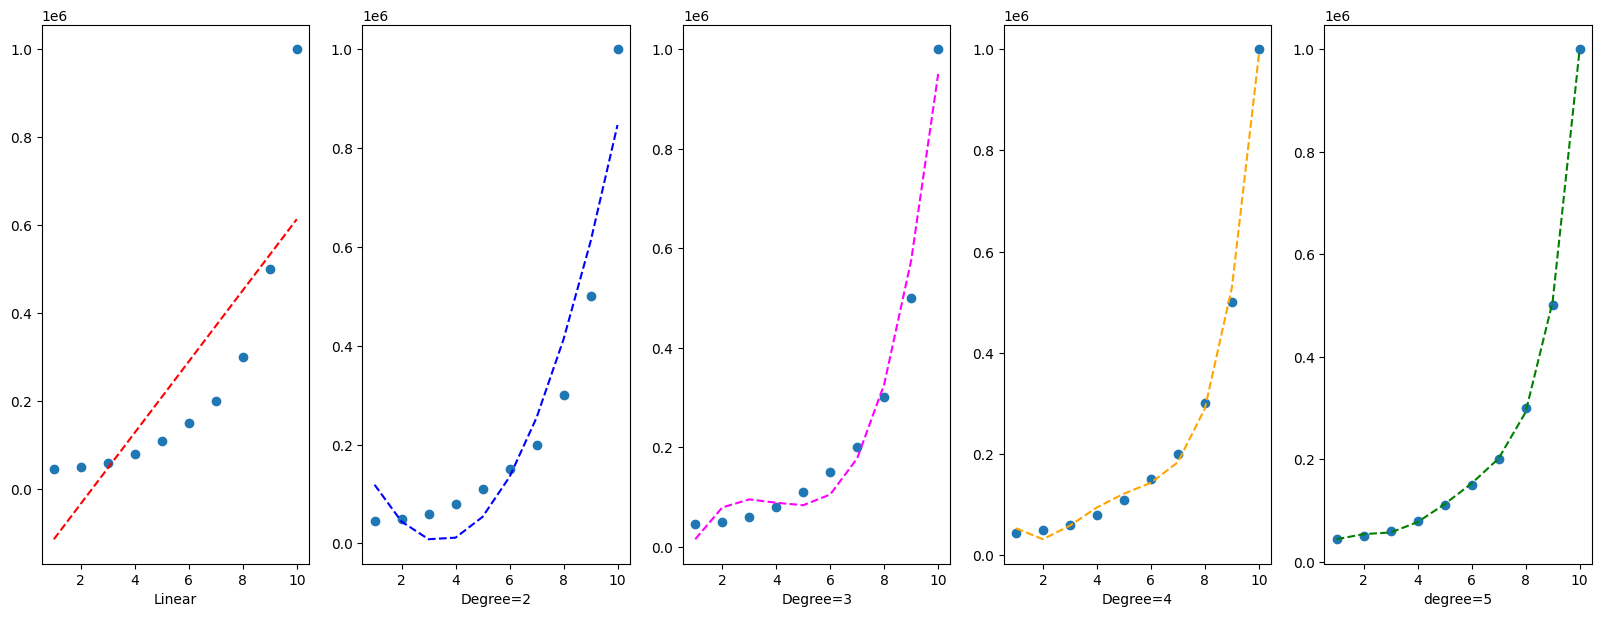

In [54]:
fig, ax = plt.subplots(1, 5, figsize=(20, 7))

ax[0].scatter(x, y)
ax[0].plot(x, lm2.predict(x1), '--', color='red', label="degree=1")
ax[0].set_xlabel("Linear")

sorted_zip = sorted(zip(x, pipeline2.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[1].scatter(x, y)
ax[1].plot(x_range, y_poly_pred, '--', color='blue', label="degree=2")
ax[1].set_xlabel("Degree=2")

sorted_zip = sorted(zip(x, pipeline3.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[2].scatter(x, y)
ax[2].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
ax[2].set_xlabel("Degree=3")

sorted_zip = sorted(zip(x, pipeline4.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[3].scatter(x, y)
ax[3].plot(x_range, y_poly_pred, '--', color='orange', label="degree=4")
ax[3].set_xlabel("Degree=4")

sorted_zip = sorted(zip(x, pipeline5.predict(x1)), key=sort_axis)
x_range, y_poly_pred = zip(*sorted_zip)
ax[4].scatter(x, y)
ax[4].plot(x_range, y_poly_pred, '--', color='green', label="degree=5")
ax[4].set_xlabel("degree=5")

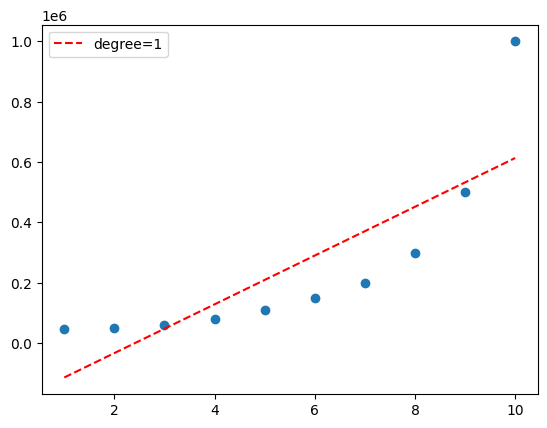

Degree=1, R2=0.6690412331929895


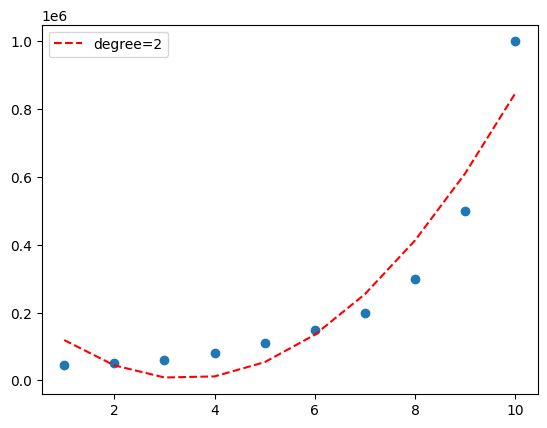

Degree=2, R2=0.9162082221443943


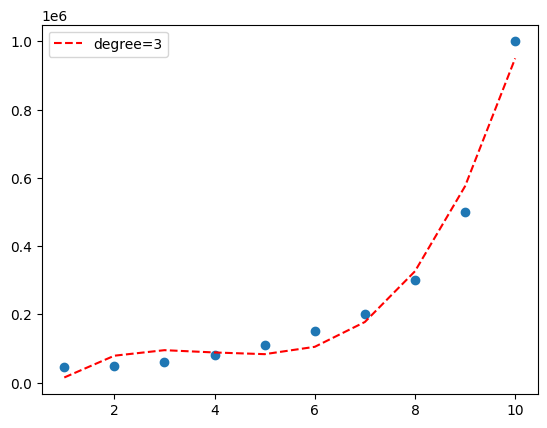

Degree=3, R2=0.9812097727913365


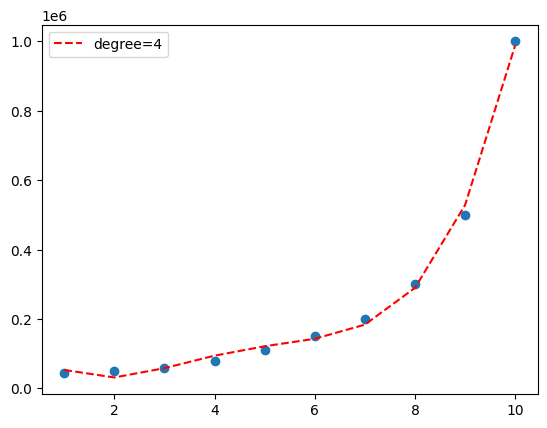

Degree=4, R2=0.9973922891706611


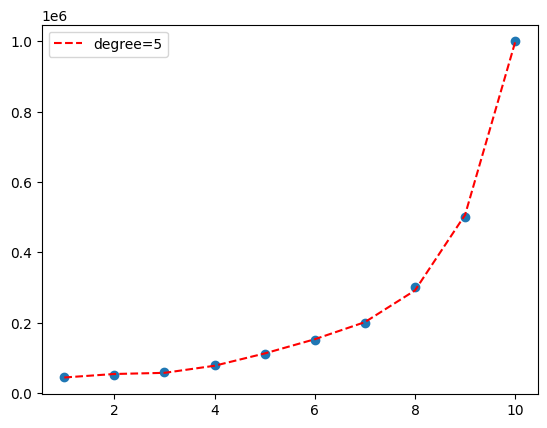

Degree=5, R2=0.9997969027099755


In [45]:
plt.scatter(x, y)
x1 = np.array(x).reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(x1,y)
plt.plot(x, lm1.predict(x1), '--', color='red', label="degree=1")
plt.legend()
plt.show()
print("Degree=1, R2={}".format(lm1.score(x1,y)))

for i in np.arange(2, 6):
    pipeline1 = make_pipeline(PolynomialFeatures(degree = i,include_bias=False),LinearRegression())
    lm  = pipeline1.fit(X = x1,y = y)
    lm.score(x1,y)
    plt.scatter(x, y)
    plt.plot(x, lm.predict(x1), '--', color='red', label="degree={}".format(i))
    plt.legend()
    plt.show()
    print("Degree={}, R2={}".format(i, lm.score(x1,y)))
    #im większy stopień wielomianu tym lepsze dopasowanie

In [ ]:
# pytanie czy ostatnia nie za idealnie
# stopnia 4 najlepiej 
# zeby stwierdzic ktory stopien to najlepiej by bylo wziac drtuga firme i sprawdzic czy dla tej drugiej firmy
# ten trend sie sprawdza
